In [1]:
from astropy.io import fits
file = '/home/ekaterina/Documents/appaloosa/stars_shortlist/M44/hlsp_everest_k2_llc_211943618-c05_kepler_v2.0_lc.fits'
hdu = fits.open(file)
data_rec = hdu[1].data
type(data_rec)

astropy.io.fits.fitsrec.FITS_rec

In [7]:
data_rec[['FLUX','FCOR']]

/usr/local/lib/python3.5/dist-packages/numpy/core/records.py:513: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.15 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
import numpy as np
import pandas as pd

def h5store(filename, df, **kwargs):
    store = pd.HDFStore(filename)
    store.put('mydata', df)
    store.get_storer('mydata').attrs.metadata = kwargs
    store.close()

def h5load(store):
    data = store['mydata']
    metadata = store.get_storer('mydata').attrs.metadata
    return data, metadata

a = pd.DataFrame(
    data=pd.np.random.randint(0, 100, (10, 5)), columns=list('ABCED'))

filename = '/home/ekaterina/research/k2_cluster_flares/aprun/211/data.h5'
metadata = dict(local_tz='US/Eastern')
h5store(filename, a, **metadata)
with pd.HDFStore(filename) as store:
    data, metadata = h5load(store)

print(metadata)

{'local_tz': 'US/Eastern'}


In [ ]:
file = '/home/ekaterina/Documents/appaloosa/stars_shortlist/M44/hlsp_everest_k2_llc_211943618-c05_kepler_v2.0_lc.fits'
RunLC(file=file, dbmode='everest', display=True, debug=False, nfake=10)


0.040000000000000036 205


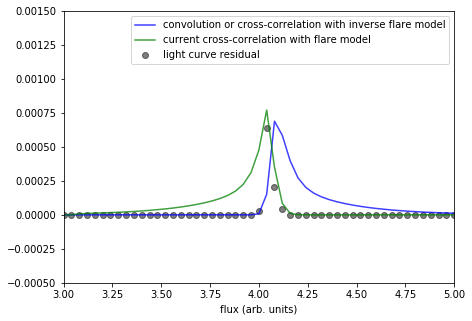

In [1]:
%matplotlib inline
from scipy import signal
from aflare import aflare1
import numpy as np
import matplotlib.pyplot as plt
lc = 100*[0]+[0.00075 - 0.00025*x for x in range(1)]+104*[0]
lc = 100*[0] + [0.000025] + [0.0000025*(x**4) for x in range(1,5)][::-1]+100*[0]
time = np.arange(0,8.2,.04)
dt = np.nanmedian(time[1:] - time[0:-1])
signalfwhm = dt * 2
print(dt,len(time))
ftime = np.arange(0, 2, dt)
modelfilter = aflare1(ftime, 1, signalfwhm, 1)
convolve = signal.convolve(lc,modelfilter, mode='same')
crosscorrelate = signal.correlate(lc,modelfilter, mode='same')
fig = plt.figure(figsize=(7,5))
plt.plot(time, convolve,color='blue',alpha=0.75,label='convolution or cross-correlation with inverse flare model')
plt.plot(time, crosscorrelate,color='green',alpha=0.75,label='current cross-correlation with flare model')
plt.scatter(time,lc,label='light curve residual',color='black',alpha=0.5)
plt.xlim(3,5)
plt.ylim(-.0005,.0015)
plt.xlabel('time (arb. units)')
plt.xlabel('flux (arb. units)')
plt.legend()
plt.savefig('/home/ekaterina/Documents/appaloosa/appaloosa/pics_for_github/corr_vs_conv.jpg')

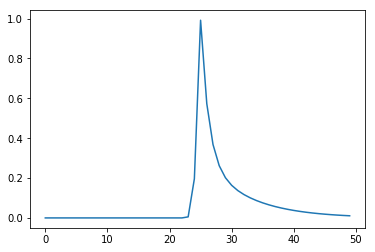

In [70]:
plt.plot(modelfilter)

In [ ]:
file = '/home/ekaterina/Documents/appaloosa/stars_shortlist/M44/hlsp_everest_k2_llc_211943618-c05_kepler_v2.0_lc.fits'
RunLC(file=file, dbmode='everest', display=True, debug=True, nfake=20)
file = '/home/ekaterina/Documents/vanderburg/hlsp_k2sff_k2_lightcurve_220132548-c08_kepler_v1_llc-default-aper.txt'
RunLC(file=file, dbmode='vdb', display=True, debug=True, nfake=20)
file = '/home/ekaterina/Documents/appaloosa/misc/testdata/ktwo210422945-c04_llc.fits'
RunLC(file=file, dbmode='ktwo', display=True, debug=True, nfake=20)

In [2]:
import numpy as np
x = np.array([10,23,34,44,56,78,110])
bins = np.array([0,30,60,100])
np.digitize(x,bins)

array([1, 1, 2, 2, 2, 3, 4])

In [ ]:
,kind